In [13]:
 !pip install transformers

In [14]:
import os
import pandas as pd
import numpy as np

In [15]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [16]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/5-class-bangla-news-comments/5 class Bangla News comments dataset.xlsx


In [17]:
df=pd.read_excel('/kaggle/input/5-class-bangla-news-comments/5 class Bangla News comments dataset.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13802 entries, 0 to 13801
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  13802 non-null  int64 
 1   Index       13802 non-null  int64 
 2   Text        13800 non-null  object
 3   Sentiment   13802 non-null  object
 4   Label       13802 non-null  int64 
 5   Token       13802 non-null  object
 6   Token_ID    13802 non-null  object
dtypes: int64(3), object(4)
memory usage: 754.9+ KB


In [18]:
pip install ktrain

Note: you may need to restart the kernel to use updated packages.


In [19]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0" 

In [20]:
import ktrain
from ktrain import text

In [35]:
df.head()

,Unnamed: 0,Index,Text,Sentiment,Label,Token,Token_ID
0,4068,4068,প্রথম আলোর উচিত হা হা রিএক্ট চালু করা,Positive,2,"['পর', '##থম', 'আলে', '##ার', 'উচিত', 'হা', 'হ...","[2076, 25492, 24182, 3187, 2351, 7725, 7725, 6..."
1,10991,10991,শ্রীলংকার সাথে সাকিব যেদিন আম্পায়ারদের ভুল সি...,Positive,2,"['শর', '##ীল', '##ংকার', 'সাথে', 'সাকিব', 'যেদ...","[14033, 36600, 62021, 2179, 4798, 9012, 5027, ..."
2,1072,1072,যেকোনো ব্যবসা প্রতিষ্ঠান সরকারের হাতে থাকলেই চ...,Very Negative,3,"['যে', '##কে', '##ানে', '##া', 'ব', '##যব', '#...","[2060, 2071, 31044, 2395, 5740, 69734, 6240, 5..."
3,1040,1040,তম হয়ে পাস করেছি মিস্টি বিতরণ করা হোক,Very Positive,4,"['তম', 'হয', '##ে', 'পাস', 'করেছি', 'মিস', '##...","[2380, 33668, 2094, 3094, 3267, 3139, 2294, 55..."
4,8099,8099,কারখানা খুব লাভ করেছে এই অজুহাতে আবার বেতন বাড়...,Neutral,1,"['কারখানা', 'খ', '##ব', 'লাভ', 'করেছে', 'এই', ...","[4234, 5356, 4282, 2325, 2124, 2045, 28867, 29..."


In [21]:
train=df[:int(.8*len(df))]
test=df[int(.8*len(df)):int(.9*len(df))]
validation=df[int(.9*len(df)):]
x_train=train['Text'].tolist()
y_train=train['Label'].tolist()
x_validation=validation['Text'].tolist()
y_validation=validation['Label'].tolist()
x_test=test['Text'].tolist()
y_test=test['Label'].tolist()

In [22]:
x_train= np.array(x_train)
x_validation= np.array(x_validation)
x_test= np.array(x_test)


In [36]:
categories = [0,1,2,3,4]

In [37]:
model_name = 'sagorsarker/bangla-bert-base'
trans = text.Transformer(model_name,maxlen=250,class_names=categories)

In [38]:
train = trans.preprocess_train(x_train,y_train)
valid = trans.preprocess_test(x_validation,y_validation)

preprocessing train...
language: bn
train sequence lengths:
	mean : 19
	95percentile : 55
	99percentile : 80


Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 19
	95percentile : 55
	99percentile : 81


In [39]:
model = trans.get_classifier()

In [40]:
learner = ktrain.get_learner(model, train_data=train,val_data=valid, batch_size=12)

In [41]:
from sklearn.utils import class_weight
class_weight=class_weight.compute_class_weight(class_weight='balanced',classes=np.unique(y_train),y=y_train)
weight={i:class_weight[i] for i in range(5)}

simulating training for different learning rates... this may take a few moments...
Epoch 1/10
920/920 [==============================] - 636s 671ms/step - loss: 1.5828 - accuracy: 0.2808
Epoch 2/10
920/920 [==============================] - 618s 672ms/step - loss: 1.5311 - accuracy: 0.3036
Epoch 3/10
920/920 [==============================] - 618s 672ms/step - loss: 1.4701 - accuracy: 0.3529
Epoch 4/10
920/920 [==============================] - 618s 671ms/step - loss: 1.4802 - accuracy: 0.3525
Epoch 5/10
920/920 [==============================] - 616s 670ms/step - loss: 1.6110 - accuracy: 0.2608
Epoch 6/10
920/920 [==============================] - 616s 670ms/step - loss: 1.6590 - accuracy: 0.2504
Epoch 7/10
920/920 [==============================] - 612s 665ms/step - loss: 5.6084 - accuracy: 0.2326
Epoch 8/10
920/920 [==============================] - 4s 4ms/step - loss: 12.5982 - accuracy: 0.2083


done.
Visually inspect loss plot and select learning rate associated with falling loss

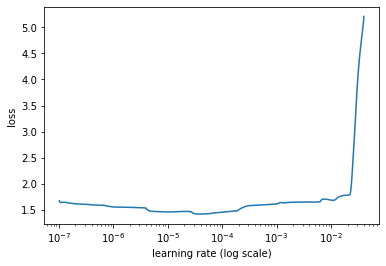

In [42]:
learner.lr_find(show_plot = True,max_epochs=10)

In [43]:
learner.fit_onecycle(1e-5,10,class_weight=weight) 



begin training using onecycle policy with max lr of 1e-05...
Epoch 1/10
921/921 [==============================] - 655s 694ms/step - loss: 1.5906 - accuracy: 0.2549 - val_loss: 1.5408 - val_accuracy: 0.2998
Epoch 2/10
921/921 [==============================] - 634s 688ms/step - loss: 1.5121 - accuracy: 0.3259 - val_loss: 1.5844 - val_accuracy: 0.2701
Epoch 3/10
921/921 [==============================] - 633s 688ms/step - loss: 1.4420 - accuracy: 0.3811 - val_loss: 1.5880 - val_accuracy: 0.2643
Epoch 4/10
921/921 [==============================] - 633s 688ms/step - loss: 1.3377 - accuracy: 0.4331 - val_loss: 1.6196 - val_accuracy: 0.2759
Epoch 5/10
921/921 [==============================] - 634s 688ms/step - loss: 1.1584 - accuracy: 0.5246 - val_loss: 1.7080 - val_accuracy: 0.2882
Epoch 6/10
921/921 [==============================] - 637s 692ms/step - loss: 0.8835 - accuracy: 0.6441 - val_loss: 1.9872 - val_accuracy: 0.2875
Epoch 7/10
921/921 [==============================] - 634s 68

In [44]:
learner.validate(class_names=categories)

              precision    recall  f1-score   support

           0       0.28      0.33      0.31       309
           1       0.34      0.20      0.25       310
           2       0.14      0.16      0.15       153
           3       0.40      0.40      0.40       390
           4       0.34      0.42      0.37       219

    accuracy                           0.32      1381
   macro avg       0.30      0.30      0.30      1381
weighted avg       0.32      0.32      0.31      1381



array([[103,  37,  32,  97,  40],
       [ 80,  62,  49,  66,  53],
       [ 36,  21,  24,  35,  37],
       [109,  44,  33, 156,  48],
       [ 35,  21,  37,  35,  91]])

In [45]:
predictor = ktrain.get_predictor(learner.model, preproc=trans)

In [46]:
y_pred = predictor.predict(x_test)
#print(y_pred)

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.30      0.32      0.31       337
           1       0.32      0.23      0.27       316
           2       0.13      0.19      0.15       113
           3       0.37      0.35      0.36       374
           4       0.38      0.41      0.39       240

    accuracy                           0.31      1380
   macro avg       0.30      0.30      0.30      1380
weighted avg       0.32      0.31      0.31      1380



FileNotFoundError: [Errno 2] No such file or directory: '5 sagorsarker/bangla-bert-base Confusion Matrix.png'

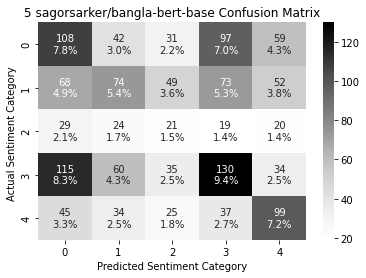

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.1%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(5,5)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greys')

ax.set_title('5 sagorsarker/bangla-bert-base Confusion Matrix');
ax.set_xlabel('Predicted Sentiment Category')
ax.set_ylabel('Actual Sentiment Category ');

ax.xaxis.set_ticklabels(['0','1','2','3','4'])
ax.yaxis.set_ticklabels(['0','1','2','3','4'])
sns.set(color_codes=True)
sns.set(font_scale=.8)
plt.savefig('5 sagorsarker/bangla-bert-base Confusion Matrix.png', bbox_inches = "tight")
plt.show()